# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

import plotly.express as px

from plotly import graph_objects
from plotly.graph_objs import Layout

In [30]:
df = pd.read_csv('yfinance.csv', index_col = 0, header = [0,1])
df.head()

Adj Close                                 Close                \
               ^BVSP          ^DJI         ^IXIC     ^BVSP          ^DJI   
Date                                                                       
2021-09-13  116404.0  34869.628906  15105.580078  116404.0  34869.628906   
2021-09-14  116181.0  34577.570312  15037.759766  116181.0  34577.570312   
2021-09-15  115063.0  34814.390625  15161.530273  115063.0  34814.390625   
2021-09-16  113794.0  34751.320312  15181.919922  113794.0  34751.320312   
2021-09-17  111439.0  34584.878906  15043.969727  111439.0  34584.878906   

                              High                                   Low  \
                   ^IXIC     ^BVSP          ^DJI         ^IXIC     ^BVSP   
Date                                                                       
2021-09-13  15105.580078  117046.0  34939.101562  15215.440430  114300.0   
2021-09-14  15037.759766  117270.0  34990.359375  15181.190430  115809.0   
2021-09-15  15161.530273  116312.0  34880.769531  15174.379883  114741.0   
2021-09-16  15181.919922  115062.0  34943.550781  15205.500000  113395.0   
2021-09-17  15043.969727  113794.0  34779.859375  15166.559570  111157.0   

                                            Open                              \
                    ^DJI         ^IXIC     ^BVSP          ^DJI         ^IXIC   
Date                                                                           
2021-09-13  34665.500000  15030.849609  114300.0  34665.500000  15211.429688   
2021-09-14  34510.300781  15008.299805  116405.0  34906.898438  15168.450195   
2021-09-15  34522.031250  14984.679688  116191.0  34580.949219  15071.339844   
2021-09-16  34540.109375  15047.139648  115062.0  34810.269531  15120.089844   
2021-09-17  34519.628906  14998.730469  113794.0  34737.859375  15163.360352   

                Volume                             
                 ^BVSP         ^DJI         ^IXIC  
Date                                               
2021-09-13   9253400.0  334190000.0  4.723370e+09  
2021-09-14   9034100.0  325140000.0  4.593140e+09  
2021-09-15   9456800.0  317490000.0  4.465140e+09  
2021-09-16  10685500.0  278270000.0  3.701500e+09  
2021-09-17  14827600.0  560630000.0  6.709540e+09

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 519 entries, 2021-09-13 to 2023-09-13
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, ^BVSP)  501 non-null    float64
 1   (Adj Close, ^DJI)   504 non-null    float64
 2   (Adj Close, ^IXIC)  504 non-null    float64
 3   (Close, ^BVSP)      501 non-null    float64
 4   (Close, ^DJI)       504 non-null    float64
 5   (Close, ^IXIC)      504 non-null    float64
 6   (High, ^BVSP)       501 non-null    float64
 7   (High, ^DJI)        504 non-null    float64
 8   (High, ^IXIC)       504 non-null    float64
 9   (Low, ^BVSP)        501 non-null    float64
 10  (Low, ^DJI)         504 non-null    float64
 11  (Low, ^IXIC)        504 non-null    float64
 12  (Open, ^BVSP)       501 non-null    float64
 13  (Open, ^DJI)        504 non-null    float64
 14  (Open, ^IXIC)       504 non-null    float64
 15  (Volume, ^BVSP)     501 non-null    float64
 1

In [61]:
df_close = df['Adj Close']
df_close.head()

,^BVSP,^DJI,^IXIC
Date,,,
2021-09-13,116404.0,34869.628906,15105.580078
2021-09-14,116181.0,34577.570312,15037.759766
2021-09-15,115063.0,34814.390625,15161.530273
2021-09-16,113794.0,34751.320312,15181.919922
2021-09-17,111439.0,34584.878906,15043.969727


#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [70]:
#tive de remover os nas pois o rolling estava retornando uma df sem os dados para BVSP
df_close = df_close.dropna()

In [71]:
# calculando média móvel 
# transformando a df com stack para plotar o gráfico e já renomeando as colunas
df_close_movel90 = df_close.rolling(90).mean()
df_close_movel90I = df_close_movel90.stack().reset_index()
df_close_movel90I.columns = ['data', 'ativo', 'valor']
df_close_movel90I

In [74]:
# calculando desvio padrão
# transformando a df com stack para plotar o gráfico e já renomeando as colunas
df_close_std90 = df_close.rolling(90).std()
df_close_std90I = df_close_std90.stack().reset_index()
df_close_std90I.columns = ['data', 'ativo', 'valor']
df_close_std90I.head()

,data,ativo,valor
0,2022-01-25,^BVSP,3872.332952
1,2022-01-25,^DJI,766.579693
2,2022-01-25,^IXIC,552.593425
3,2022-01-26,^BVSP,3779.062426
4,2022-01-26,^DJI,775.309113


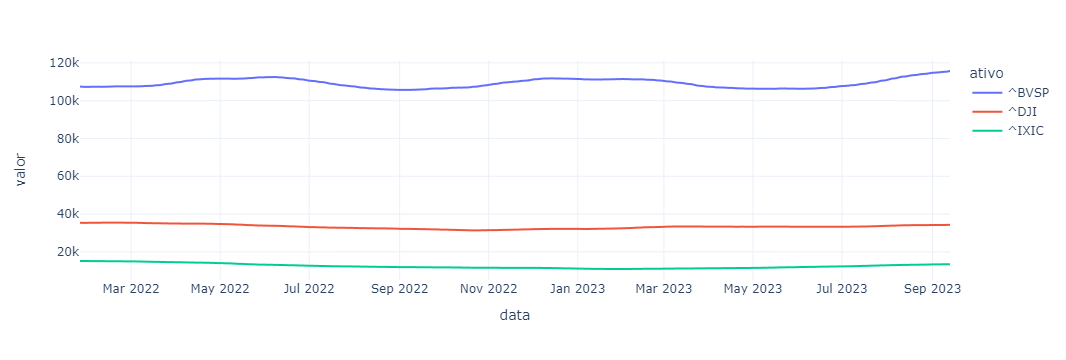

In [75]:
#Gráfico para média móvel
fig = px.line(df_close_movel90I, x = 'data', y = 'valor', color = 'ativo', template = 'plotly_white')
fig.show()

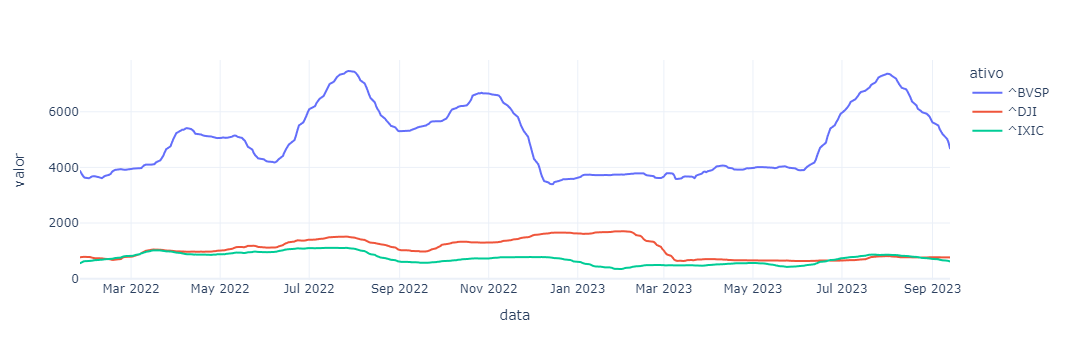

In [76]:
#Gráfico para std da média móvel
fig = px.line(df_close_std90I, x = 'data', y = 'valor', color = 'ativo', template = 'plotly_white')
fig.show()

> Comparando os três gráficos, a ```^BVSP```ainda parece apresentar a maior volatilidade. Sua curva é cheia de inclinações

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [77]:
#selecionando os indicadores e 
indicadores = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
ativo = ['^DJI']*len(indicadores)

#criando o ome de colunas multindex
colunas = list(zip(indicadores, ativo))
colunas

In [123]:
# selecioando as últimas 60 observações
dji = df.tail(60)
dji = dji[colunas]
dji.columns = indicadores
dji.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-06-22,33946.710938,33946.710938,34003.558594,33835.390625,33900.468750,275600000.0
2023-06-23,33727.429688,33727.429688,33835.660156,33646.488281,33835.660156,379800000.0
2023-06-26,33714.710938,33714.710938,33819.488281,33610.320312,33730.789062,265330000.0
2023-06-27,33926.738281,33926.738281,33975.648438,33730.390625,33739.031250,293210000.0
2023-06-28,33852.660156,33852.660156,33903.761719,33755.921875,33881.378906,268050000.0


In [127]:
# typecasting index to datetime
dji.index = pd.DatetimeIndex(dji.index) 

In [130]:
#criando o dicionário com as infos do gráfico candlestick
graph = {
    'x':dji.index,
    'open':dji.Open,
    'close': dji.Close,
    'high': dji.High,
    'low': dji.Low,
    'type': 'candlestick',
    'name': '^DJI',
    'showlegend': True
        }

In [131]:
# retirando Nan para não atrapalhar a visualização
dji = dji.dropna()
dji.isna().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

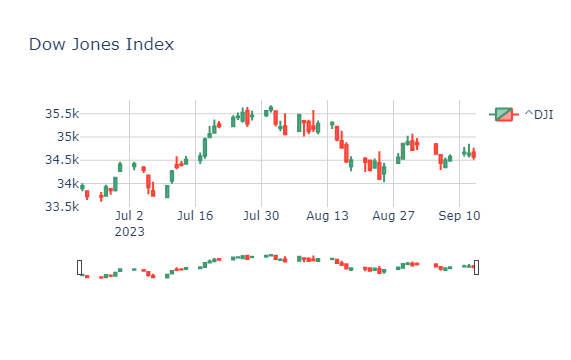

In [132]:
#plotando o gráfico
layout = Layout(
    paper_bgcolor = 'rgba(0,0,0,0)',
    plot_bgcolor = 'rgba(0,0,0,0)'
)

grafico = graph_objects.Figure(
    data = [graph],
    layout_title = 'Dow Jones Index',
    layout = layout
)

grafico.update_xaxes(showgrid = True, gridwidth = 1, gridcolor = 'LightGrey')
grafico.update_yaxes(showgrid = True, gridwidth = 1, gridcolor = 'LightGrey')

grafico